# Classical Time Series Forecasting

This notebook provides an **end-to-end workflow for classical time series forecasting** using well-established statistical models.

The goal is to demonstrate how traditional methods can be applied, evaluated, and compared in a clear and practical way.

---

## 📌 Models Covered
- **Simple Exponential Smoothing (SES)**
- **Holt’s Linear Trend Method**
- **Holt-Winters (Additive & Multiplicative)**
- **ARIMA**
- **SARIMA**

---

## 🔍 Workflow Overview
1. Exploratory Data Analysis (EDA)
2. Trend and Seasonality Inspection
3. Stationarity Checks
4. Model Training
5. Model Selection using AIC
6. Forecasting and Visualization
7. Performance Evaluation

---

## 🎯 Key Objectives
- Understand when and why to use classical forecasting models  
- Compare different approaches on the same time series  
- Build interpretable and statistically sound forecasts  

---

## 🛠 Tools & Libraries
- `pandas`, `numpy`
- `matplotlib`, `seaborn`
- `statsmodels`
- `scikit-learn`

---

## 📈 Evaluation Metrics
Forecast performance is assessed using:
- MAE (Mean Absolute Error)
- Visual comparison of forecasts vs actual values

---

## 🚀 Conclusion
Classical time series models remain powerful, interpretable, and effective baselines for forecasting problems, especially when data size is limited and explainability is important.


# 🔧 1. Import Required Libraries

In [15]:
import pandas as pd 
import seaborn as sns
import numpy as np 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# 📥 2. Loading the Dataset

In [2]:
df = pd.read_csv("/kaggle/input/for-simple-exercises-time-series-forecasting/Miles_Traveled.csv" , index_col = "DATE" , parse_dates=True)
df.head()


,TRFVOLUSM227NFWA
DATE,
1970-01-01,80173.0
1970-02-01,77442.0
1970-03-01,90223.0
1970-04-01,89956.0
1970-05-01,97972.0


<Axes: xlabel='DATE'>

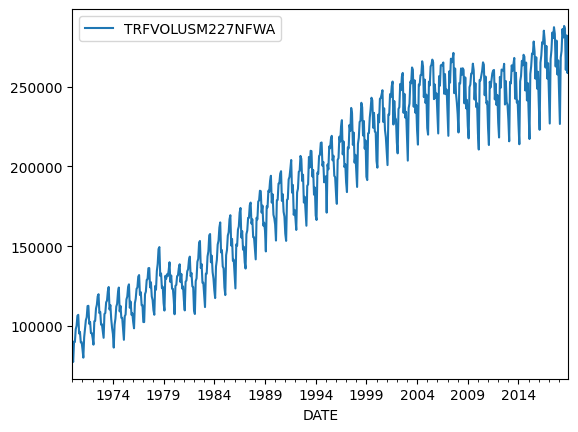

In [3]:
df.plot()

# 🧪 3. Stationarity Test with Augmented Dickey-Fuller (ADF)

In this step, the **Augmented Dickey-Fuller (ADF) test** is applied to statistically determine whether the time series is stationary.

- **H₀ (Null Hypothesis):** The time series is non-stationary  
- **H₁ (Alternative Hypothesis):** The time series is stationary  

The p-value returned by the ADF test is used to make the decision:
- If `p-value < 0.05`, the null hypothesis is rejected → **Stationary**
- Otherwise, the null hypothesis cannot be rejected → **Non-stationary**

This test provides a formal validation of stationarity before applying time series models.


In [4]:
import statsmodels.api as sm

p_value = sm.tsa.stattools.adfuller(df)[1]

# "HO: Non-stationary"
# "H1: Stationary"
if p_value < 0.05:
    print(F"Result: Stationary (H0: non-stationary, p-value: {round(p_value, 3)})")
else:
    print(F"Result: Non-Stationary (H0: non-stationary, p-value: {round(p_value, 3)})")

Result: Non-Stationary (H0: non-stationary, p-value: 0.655)


# 📉 4. Time Series Decomposition (Trend, Seasonality & Residuals)


<Figure size 1200x800 with 0 Axes>

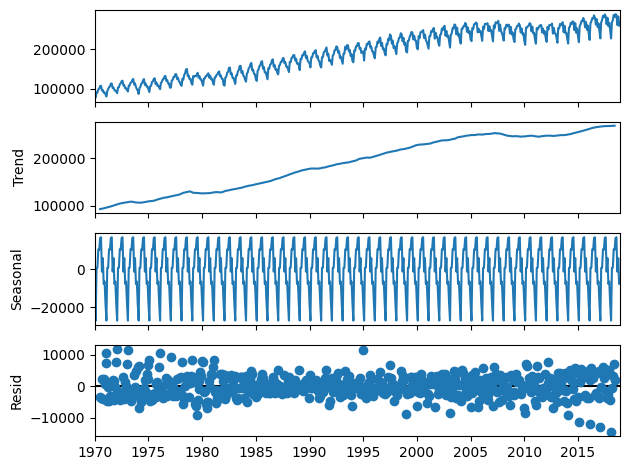

In [5]:
from statsmodels.tsa.seasonal import seasonal_decompose 

result = seasonal_decompose(df , model="additive")

plt.figure(figsize = (12 , 8))
result.plot()
plt.show()



In [6]:
df.shape

(588, 1)

In [8]:
train = df[:450]
print(len(train))
test = df[450:]
print(len(test))


450
138


In [9]:
from sklearn.metrics import mean_absolute_error

def plot_smoothing(train, test, y_pred, title):
    mae = mean_absolute_error(test, y_pred)

    fig, ax = plt.subplots(figsize=(6, 4))

    train.plot(ax=ax, label="Train")
    test.plot(ax=ax, label="Test")
    y_pred.plot(ax=ax, label="Prediction")

    ax.set_title(f"{title} | MAE: {round(mae, 2)}")
    ax.legend()

    plt.show()


# 📈 5. Simple Exponential Smoothing (SES) Model Evaluation


alpha : 0.1 mae : 14451.1726
alpha : 0.2 mae : 14025.6278
alpha : 0.3 mae : 13874.8913
best_alpha : 0.3 best_mae : 13874.8913


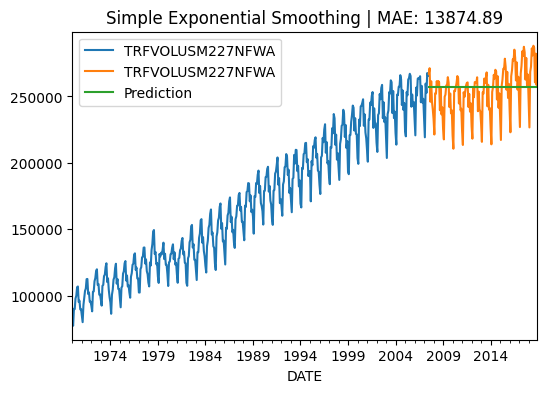

In [16]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

alphas = np.arange(0.1 , 1, 0.10)

def ses_optimizer(train , alphas , step =138):
    best_alpha , best_mae = None , float("inf")
    for alpha in alphas:
        ses_model = SimpleExpSmoothing(train).fit(smoothing_level = alpha)
        y_pred = ses_model.forecast(step)
        mae = mean_absolute_error(test , y_pred)
        if mae < best_mae:
            best_alpha , best_mae = alpha , mae
            print("alpha :" , round(alpha,2) , "mae :" , round(mae ,4))
    print("best_alpha :" , round(best_alpha ,2) , "best_mae :" , round(best_mae , 4))
    return best_alpha , best_mae


best_alpha , best_mae = ses_optimizer(train , alphas )

final_ses = SimpleExpSmoothing(train).fit(smoothing_level = best_alpha)
y_pred = final_ses.forecast(138)
mae = mean_absolute_error(test , y_pred)

plot_smoothing(train , test , y_pred , "Simple Exponential Smoothing")


# 📈 6. Double Exponential Smoothing (Holt’s Method)

alpha : 0.01 beta : 0.01 mae : 13874.8913
alpha : 0.01 beta : 0.11 mae : 13874.8913
alpha : 0.01 beta : 0.21 mae : 13874.8913
alpha : 0.01 beta : 0.41 mae : 13874.8913
alpha : 0.01 beta : 0.51 mae : 13874.8913
alpha : 0.01 beta : 0.71 mae : 13874.8913
best_alpha : 0.01 best_beta : 0.71 best_mae : 12963.7776


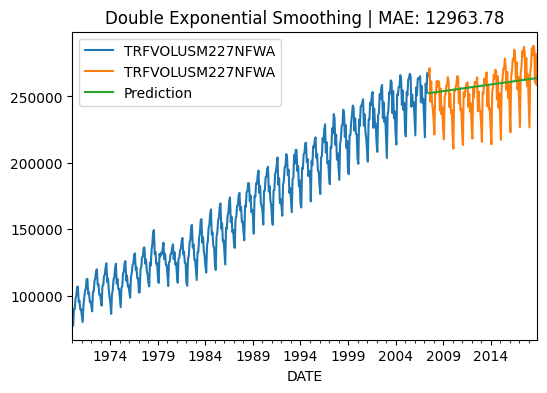

In [17]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing


alphas = np.arange(0.01 , 1 , 0.10)
betas = np.arange(0.01 , 1 , 0.10)

def des_optimizer(train , alphas , betas , step = 138):
    best_alpha , best_beta , best_mae = None , None , float("inf")
    for alpha in alphas:
        for beta in betas:
            des_model = ExponentialSmoothing(train , trend="add").fit(smoothing_level = alpha , smoothing_trend = beta)
            y_pred = des_model.forecast(step)
            mea = mean_absolute_error(test, y_pred)
            if mea < best_mae:
                best_alpha , best_beta , best_mae = alpha , beta , mea
                print("alpha :" , round(alpha , 2) , "beta :" , round(beta , 2) , "mae :" , round(mae , 4))
    print("best_alpha :" , round(best_alpha,2) , 'best_beta :' , round(best_beta , 2) , "best_mae :" , round(best_mae ,4))
    return best_alpha , best_beta , best_mae

best_alpha , best_beta , best_mae = des_optimizer(train , alphas , betas)
final_des = ExponentialSmoothing(train , trend="add").fit(smoothing_level = best_alpha , smoothing_trend = best_beta)
y_pred = final_des.forecast(138)
mae = mean_absolute_error(test , y_pred)

plot_smoothing(train , test , y_pred , "Double Exponential Smoothing")

# 📈 7. Triple Exponential Smoothing (Holt–Winters Method)


alpha : 0.4 beta : 0.4 gamma : 0.4 mae : 75617.0321
alpha : 0.4 beta : 0.4 gamma : 0.5 mae : 34469.3486
alpha : 0.4 beta : 0.4 gamma : 0.6 mae : 33049.95
alpha : 0.4 beta : 0.4 gamma : 0.8 mae : 12331.6961
alpha : 0.4 beta : 0.4 gamma : 0.9 mae : 8295.2475
alpha : 0.4 beta : 0.8 gamma : 0.4 mae : 7799.6943
alpha : 0.5 beta : 0.6 gamma : 0.6 mae : 7442.9705
best_alpha : 0.5 best_beta : 0.6 best_gamma : 0.6 best_mae 7442.9705


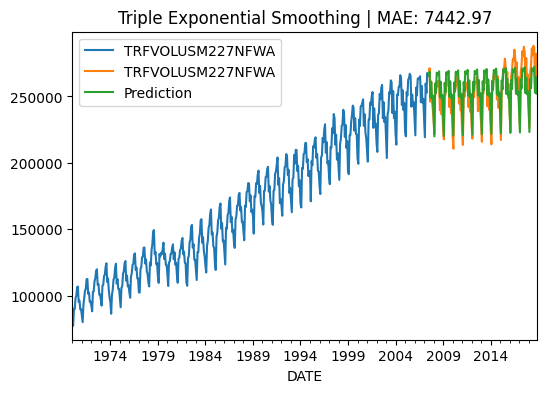

In [18]:
import itertools
alphas = betas = gammas = np.arange(0.40 , 1 , 0.10)

abg = list(itertools.product(alphas, betas, gammas))

def tes_optimizer(train , abg, step=138):
    best_alpha , best_beta , best_gamma , best_mae = None , None , None , float("inf")
    for comb in abg:
        tes_model = ExponentialSmoothing(train , trend = "add" , seasonal = "add" , seasonal_periods = 12 ).fit(smoothing_level = comb[0] , smoothing_trend = comb[1] , smoothing_seasonal = comb[2])
        y_pred = tes_model.forecast(step)
        mae = mean_absolute_error(test, y_pred)
        if mae < best_mae:
            best_alpha , best_beta , best_gamma , best_mae = comb[0] , comb[1] , comb[2] , mae
            print("alpha :" , round(comb[0], 2) , "beta :" , round(comb[1],2) , "gamma :" , round(comb[2], 2) , "mae :" , round(mae,4) )
    print("best_alpha :" , round(best_alpha , 2) , "best_beta :" , round(best_beta , 2) , "best_gamma :" , round(best_gamma ,2) , "best_mae" , round(best_mae ,4))
    return best_alpha , best_beta , best_gamma

best_alpha , best_beta , best_gamma = tes_optimizer(train , abg)
final_tes = ExponentialSmoothing(train , trend="add" , seasonal = "add" , seasonal_periods = 12).fit(smoothing_level = best_alpha , smoothing_trend = best_beta , smoothing_seasonal = best_gamma)
y_pred = final_tes.forecast(138)

plot_smoothing(train , test , y_pred , "Triple Exponential Smoothing")

# 📈 8. ARIMA ( p , d , q ) : ( Autoregressive Integrated Moving Average )


ARIMA(0, 0, 0) AIC=13342.71
ARIMA(0, 0, 1) AIC=10508.20
ARIMA(0, 0, 2) AIC=10632.32
ARIMA(0, 0, 3) AIC=10578.63
ARIMA(0, 1, 0) AIC=9660.18
ARIMA(0, 1, 1) AIC=9646.18
ARIMA(0, 1, 2) AIC=9628.16
ARIMA(0, 1, 3) AIC=9585.83
ARIMA(0, 2, 0) AIC=10040.60
ARIMA(0, 2, 1) AIC=9660.58
ARIMA(0, 2, 2) AIC=9652.65
ARIMA(0, 2, 3) AIC=9636.24
ARIMA(0, 3, 0) AIC=10557.60
ARIMA(0, 3, 1) AIC=10027.51
ARIMA(0, 3, 2) AIC=9958.07
ARIMA(0, 3, 3) AIC=10138.82
ARIMA(1, 0, 0) AIC=9685.22
ARIMA(1, 0, 1) AIC=9671.81
ARIMA(1, 0, 2) AIC=9651.79
ARIMA(1, 0, 3) AIC=9645.59
ARIMA(1, 1, 0) AIC=9640.73
ARIMA(1, 1, 1) AIC=9638.14
ARIMA(1, 1, 2) AIC=9626.42
ARIMA(1, 1, 3) AIC=9583.38
ARIMA(1, 2, 0) AIC=9782.85
ARIMA(1, 2, 1) AIC=9657.86
ARIMA(1, 2, 2) AIC=9647.74
ARIMA(1, 2, 3) AIC=9629.24
ARIMA(1, 3, 0) AIC=10153.28
ARIMA(1, 3, 1) AIC=9760.46
ARIMA(1, 3, 2) AIC=9635.74
ARIMA(1, 3, 3) AIC=9650.37
ARIMA(2, 0, 0) AIC=9666.14
ARIMA(2, 0, 1) AIC=9671.03
ARIMA(2, 0, 2) AIC=9653.69
ARIMA(2, 0, 3) AIC=9608.59
ARIMA(2, 1, 0) AIC=

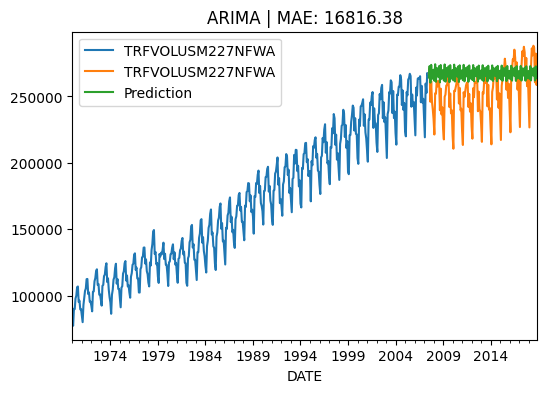

In [22]:
from statsmodels.tsa.arima.model import ARIMA

p = d = q = range(0, 4)
pdq = list(itertools.product(p, d, q))

def arima_optimizer_aic(train, orders):
    best_aic = np.inf
    best_params = None

    for order in orders:
        try:
            model = ARIMA(train, order=order)
            model_fit = model.fit()
            aic = model_fit.aic

            if aic < best_aic:
                best_aic = aic
                best_params = order

            print(f'ARIMA{order} AIC={aic:.2f}')

        except:
            continue

    print(f'\nBest ARIMA{best_params} AIC={best_aic:.2f}')
    return best_params

best_prams_aic = arima_optimizer_aic(train, pdq)

final_arima = ARIMA(train, order=best_prams_aic).fit()

y_pred = final_arima.forecast(steps=len(test))
y_pred = pd.Series(y_pred, index=test.index)

plot_smoothing(train, test, y_pred, "ARIMA")



# 📈 9. SARIMA ( p , d, q ) ( P , D , Q )m (Seasonal Autoregressive Integrated Moving-Average)




Best SARIMA(0, 1, 1)x(1, 1, 1, 12) AIC=8290.45


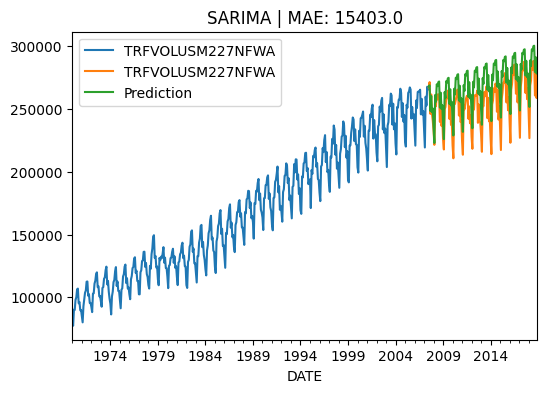

In [28]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

def sarima_optimizer_aic(train, pdq, seasonal_pdq):
    best_aic = np.inf
    best_order = None
    best_seasonal_order = None

    for param in pdq:
        for param_seasonal in seasonal_pdq:
            try:
                model = SARIMAX(train,order=param,seasonal_order=param_seasonal)
                results = model.fit()
                aic = results.aic
                if aic < best_aic:
                    best_aic = aic
                    best_order = param
                    best_seasonal_order = param_seasonal
                    
            except Exception as e:
                print(f"SARIMA{param}x{param_seasonal} failed -> {e}")

    print(f"\nBest SARIMA{best_order}x{best_seasonal_order} AIC={best_aic:.2f}")
    return best_order, best_seasonal_order

                
best_order, best_seasonal_order = sarima_optimizer_aic(train, pdq, seasonal_pdq)
model = SARIMAX(train , order= best_order , seasonal_order = best_seasonal_order)
final_sarima = model.fit()

y_pred_test = final_sarima.get_forecast(steps=len(test))

y_pred = y_pred_test.predicted_mean
y_pred = pd.Series(y_pred , index=test.index)

plot_smoothing(train , test , y_pred , "SARIMA")


